In [ ]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq

2023-07-25 18:46:20.310482: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 18:46:21.633007: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 9.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
!pip uninstall numpy
!pip install numpy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found existing installation: numpy 1.25.1
Uninstalling numpy-1.25.1:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.25.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-7a851222.3.23.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.25.1
  Using cached numpy-1.25.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


In [ ]:
reports = pd.read_csv('LDA_Jin_dataset_apple.csv')
reports.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sub-id,group,gender,age,race,employment,income,car,fashion,tech,...,talk_inperson,sns,talk_app,talk_sam,talk_other,text_app,text_sam,text_app.1,comment,purpose
0,sub-02,Apple,Male,29,White,Employed for wages,"$100,000-$149,999","BMW, Audi, Porsche, Mercedes, Ferrari Lamborhg...","gucci, guess, LV, H&M, abercrombie and fitch","apple, samsung, lg, motorola, ge",...,5,na,150,100,0,9,1,0,It was fine,Not sure
1,sub-03,Apple,Male,38,White,Employed for wages,"$50,000-$74,999","Lotus, Alfa Romeo, Lancia, Jaguar, Aston Martin",Ray Ban,"AMD, Lenovo, Asus, Nvidia",...,2,NaN,2,3,5,2,3,5,It went fine,no idea
2,sub-08,Apple,Female,29,White,A student,"$150,000 or more",BMW,Nike,apple,...,4,2,2,2,2,8,6,4,to make a decision,to make a decision
3,sub-10,Apple,Male,57,White,In between jobs,"Less than $25,000","BMW, Rivian, Tesla, Subaru, Mazda","Polo, Levis","Apple, Anker, Bose",...,5,NaN,8,2,1,12,4,1,"It was interesting, but a little difficult to ...","Brand loyalty, and the silo it creates."
4,sub-13,Apple,Female,30,White,Employed for wages,"$150,000 or more","Audi, Mercedes, BMW, Tesla","Zara, Patagonia, Kate Spade, Eileen Fisher",Apple,...,2,1000,3,0,0,4,0,0,It was enoyable,Opinions on Apple/Samsung products


In [ ]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sub-id         255 non-null    object 
 1   group          255 non-null    object 
 2   gender         255 non-null    object 
 3   age            255 non-null    int64  
 4   race           255 non-null    object 
 5   employment     255 non-null    object 
 6   income         255 non-null    object 
 7   car            255 non-null    object 
 8   fashion        255 non-null    object 
 9   tech           255 non-null    object 
 10  purchase       255 non-null    object 
 11  history        255 non-null    float64
 12  products       255 non-null    object 
 13  homo_sam       255 non-null    int64  
 14  homo_app       255 non-null    int64  
 15  share_app      255 non-null    int64  
 16  share_sam      255 non-null    int64  
 17  share_other    255 non-null    int64  
 18  network_ap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Our spaCy model:
nlp = en_core_web_md.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for summary in nlp.pipe(reports['purchase']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
reports['tokens'] = tokens
reports['tokens']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      [buy, brand, apple, computer, use, work, find,...
1      [look, pre, own, phone, try, update, model, go...
2      [like, large, sharp, display, easy, read, well...
3      [fan, apple, iphone, introduce, revolutionize,...
4      [apple, product, past, year, disliked, phone, ...
                             ...                        
250      [iphone, year, love, brand, app, desire, brand]
251    [buy, good, phone, market, iphone, user, easy,...
252    [product, apple, reliable, device, iphone, yea...
253    [buy, know, good, review, want, phone, long, t...
254    [buy, current, iphone, sleek, modern, powerful...
Name: tokens, Length: 255, dtype: object

In [ ]:
#Apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(reports['tokens'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(dictionary.token2id)

{'able': 0, 'apple': 1, 'brand': 2, 'buy': 3, 'computer': 4, 'easy': 5, 'find': 6, 'laptop': 7, 'phone': 8, 'use': 9, 'work': 10, 'compromise': 11, 'good': 12, 'look': 13, 'model': 14, 'own': 15, 'pre': 16, 'price': 17, 'quality': 18, 'try': 19, 'update': 20, 'battery': 21, 'day': 22, 'display': 23, 'large': 24, 'lean': 25, 'like': 26, 'need': 27, 'performance': 28, 'read': 29, 'recharge': 30, 'sharp': 31, 'time': 32, 'well': 33, 'cellphone': 34, 'fan': 35, 'introduce': 36, 'iphone': 37, 'love': 38, 'marvel': 39, 'revolutionize': 40, 'space': 41, 'technical': 42, 'today': 43, 'disliked': 44, 'friendly': 45, 'operating': 46, 'past': 47, 'platform': 48, 'product': 49, 'syste': 50, 'tablet': 51, 'year': 52, 'cut': 53, 'edge': 54, 'family': 55, 'fifth': 56, 'friend': 57, 'long': 58, 'perform': 59, 'sleek': 60, 'camera': 61, 'design': 62, 'feel': 63, 'know': 64, 'want': 65, 'app': 66, 'functionality': 67, 'have': 68, 'iphones': 69, 'mini': 70, 'sync': 71, 'user': 72, 'change': 73, 'familiar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in reports['tokens']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


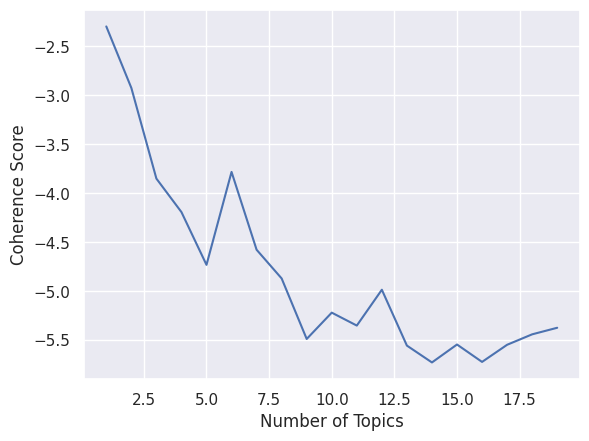

In [22]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


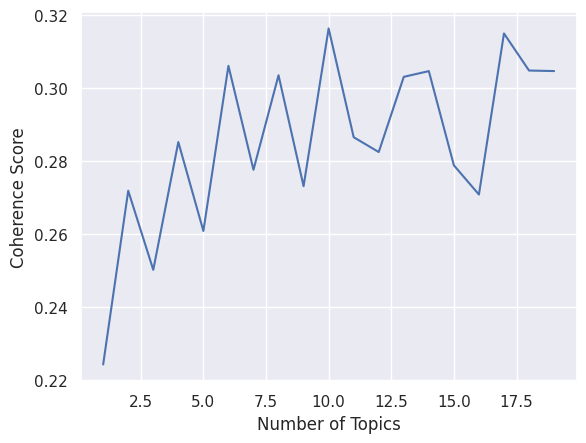

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = reports['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [18]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=10, workers = 4, passes=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
lda_model.print_topics(-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.092*"product" + 0.052*"buy" + 0.046*"iphone" + 0.036*"year" + 0.036*"brand" + 0.035*"like" + 0.034*"new" + 0.033*"computer" + 0.031*"familiar" + 0.030*"easy"'),
 (1,
  '0.067*"decide" + 0.050*"good" + 0.042*"use" + 0.042*"offer" + 0.039*"try" + 0.031*"switch" + 0.030*"quality" + 0.028*"plan" + 0.027*"android" + 0.023*"samsung"'),
 (2,
  '0.154*"brand" + 0.124*"smartphone" + 0.089*"current" + 0.084*"buy" + 0.066*"year" + 0.059*"want" + 0.031*"good" + 0.027*"change" + 0.025*"device" + 0.023*"think"'),
 (3,
  '0.069*"life" + 0.053*"good" + 0.051*"battery" + 0.045*"iphone" + 0.044*"time" + 0.041*"like" + 0.039*"easy" + 0.039*"mobile" + 0.039*"performance" + 0.038*"smartphone"'),
 (4,
  '0.067*"time" + 0.063*"android" + 0.050*"use" + 0.045*"brand" + 0.041*"family" + 0.039*"like" + 0.035*"try" + 0.034*"go" + 0.032*"find" + 0.028*"feel"'),
 (5,
  '0.091*"user" + 0.051*"friendly" + 0.038*"design" + 0.035*"brand" + 0.033*"use" + 0.030*"ios" + 0.030*"quality" + 0.029*"people" + 0.028*"

In [20]:
# Where does a text belong to
lda_model[corpus][0]
reports['purchase'][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'i bought from this brand because i have an apple computer that I use for work so I find it easy to be able to go from my laptop to phone'

In [21]:
# Visualize topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Save the report
pyLDAvis.save_html(lda_display, 'index.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
